In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# add the parent directory to the python path in order to be able to import the posCouche module 
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from posCouche.poscouche import poscouche
from posCouche.ic_utils import WEST_toroidal_field, IC_resonance_radius, IC_resonance_frequency

# Resonant Frequency vs Itor (no ripple)

Below is calculated the Ion Cyclotron resonant frequencies in WEST versus the toroidal coils current $I_{tor}$. The allowed toroidal coils currents are converted into toroidal magnetic field $B_t$ value at a given target radius $R$, then the resonant frequency is calculated at this radius $R$ (with some margins around).

In [2]:
# preset RF frequencies at plant
source_frequencies = [48, 53, 55.5, 57, 63]
# target resonance radius
R = 2.5 # m

# allowed toroidal coil current   
Itors = np.linspace(600, 1350, 101) # A
# resulting magnetic field at R, Low and High field sides
Bt_R0s = WEST_toroidal_field(Itors, R=R) 
Bt_LFS = WEST_toroidal_field(Itors, R=2.70) 
Bt_HFS = WEST_toroidal_field(Itors, R=2.40) 

# Hydrogen
f_cis_1H = np.asarray([IC_resonance_frequency(Bt_HFS, species='1H'), 
                       IC_resonance_frequency(Bt_R0s, species='1H'), 
                       IC_resonance_frequency(Bt_LFS, species='1H')])
# Hydrogen, 2nd harmonic
f_cis_1H2 = 2*np.asarray([IC_resonance_frequency(Bt_HFS, species='H'), 
                       IC_resonance_frequency(Bt_R0s, species='H'), 
                       IC_resonance_frequency(Bt_LFS, species='H')])
# Helium-3
f_cis_3He = np.asarray([IC_resonance_frequency(Bt_HFS, species='3He'), 
                       IC_resonance_frequency(Bt_R0s, species='3He'), 
                       IC_resonance_frequency(Bt_LFS, species='3He')])

<IPython.core.display.Javascript object>


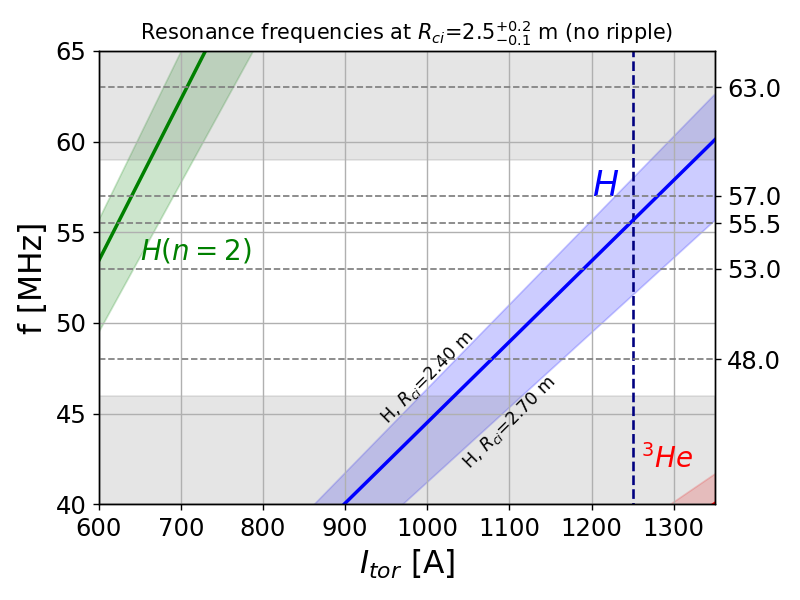

In [11]:
fig, ax = plt.subplots()
# 1H
ax.fill_between(Itors, f_cis_1H[0,:], f_cis_1H[2,:], alpha=0.2, color='b')
ax.plot(Itors, f_cis_1H[1,:], lw=2, color='b')
ax.text(1200, 57, '$H$', color='b', fontsize=20)

# 2H
ax.fill_between(Itors, f_cis_1H2[0,:], f_cis_1H2[2,:], alpha=0.2, color='g')
ax.plot(Itors, f_cis_1H2[1,:], lw=2, color='g')
ax.text(650, 53.5, '$H(n=2)$', color='g', fontsize=16)

# 2He3
ax.fill_between(Itors, f_cis_3He[0,:], f_cis_3He[2,:], alpha=0.2, color='r')
ax.plot(Itors, f_cis_3He[1,:], lw=2, color='r')
ax.text(1260, 42, '$^3He$', color='r', fontsize=16)

# indicates the radiis
ax.text(1000, 47, 'H, $R_{ci}$=2.40 m', {'ha': 'center', 'va': 'center'}, rotation=45 )
ax.text(1100, 44.5, 'H, $R_{ci}$=2.70 m', {'ha': 'center', 'va': 'center'}, rotation=45)

# axis
ax.set_xlabel('$I_{tor}$ [A]', fontsize=18)
ax.set_ylabel('f [MHz]', fontsize=18)
ax.set_ylim(40, 65)
ax.set_xlim(600, 1350)
ax.grid(True)
ax.set_title(f'Resonance frequencies at $R_{{ci}}$={R}$^{{+0.2}}_{{-0.1}}$ m (no ripple)')

# RF Generator frequencies
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(source_frequencies)
ax2.grid(True, color='gray', linestyle='--', linewidth=1)
ax.vlines(1250, 35, 85, linestyles='--', color='navy')
ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

# emphazise the operational domain
ax.axhspan(40, 46, color='gray', alpha=0.20)
ax.axhspan(59, 65, color='gray', alpha=0.20)

plt.tight_layout()

plt.savefig('WEST_ICRH_fci_vs_Itor.png', facecolor='white', dpi=200)